In [1]:
!wget https://raw.githubusercontent.com/yacin-hamdi/deep_learning/master/tensorflow/helper_functions.py

--2024-02-12 14:39:13--  https://raw.githubusercontent.com/yacin-hamdi/deep_learning/master/tensorflow/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-02-12 14:39:13 (74.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
!wget https://s3-us-west-1.amazonaws.com/udacity-robotics/Deep+Learning+Data/Lab/train.zip
!wget https://s3-us-west-1.amazonaws.com/udacity-robotics/Deep+Learning+Data/Lab/validation.zip


--2024-02-12 14:39:13--  https://s3-us-west-1.amazonaws.com/udacity-robotics/Deep+Learning+Data/Lab/train.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.193.88, 52.219.194.72, 52.219.193.64, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.193.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55561373 (53M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>]  52.99M  80.3MB/s    in 0.7s    

2024-02-12 14:39:14 (80.3 MB/s) - ‘train.zip’ saved [55561373/55561373]

--2024-02-12 14:39:14--  https://s3-us-west-1.amazonaws.com/udacity-robotics/Deep+Learning+Data/Lab/validation.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.193.88, 52.219.194.72, 52.219.193.64, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.193.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16204647 (15

In [3]:
from helper_functions import *

In [4]:
unzip_data("train.zip")
unzip_data("validation.zip")

In [5]:
import tensorflow as tf
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [6]:
def get_image_path(dir):
  image_path = []
  for root, dirs, files in os.walk(dir):
    for f in files:
      path = os.path.join(root, f)
      image_path.append(path)

  image_path.sort()
  return image_path


In [7]:
train_data_path = get_image_path("train_combined/images")
train_mask_path = get_image_path("train_combined/masks")

validation_data_path = get_image_path("validation/images")
validation_mask_path = get_image_path('validation/masks')

In [8]:
train_data_path[0], train_mask_path[0]

('train_combined/images/0_run6_cam1_00000_data_pack2.jpeg',
 'train_combined/masks/0_run6_mask_00000_data_pack2.png')

(-0.5, 255.5, 255.5, -0.5)

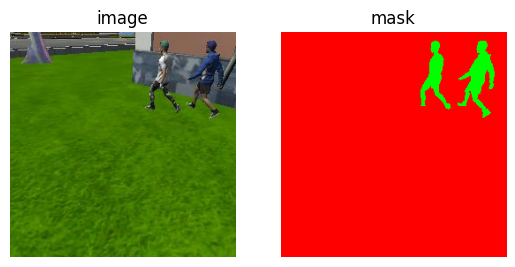

In [9]:

index = random.randint(0, len(train_data_path)-1)
train_img = mpimg.imread(train_data_path[index])
train_msk = mpimg.imread(train_mask_path[index])

plt.subplot(1, 2, 1)
plt.imshow(train_img)
plt.title('image')
plt.axis(False)

plt.subplot(1, 2, 2)
plt.imshow(train_msk)
plt.title('mask')
plt.axis(False)

In [10]:
def load_images(images_path):
  images = []
  for path in tqdm(images_path):
    image = tf.io.read_file(path)
    image = tf.image.decode_png(image, channels=3, dtype=tf.uint8)
    images.append(image)

  return images


In [11]:
train_data = load_images(train_data_path)
train_mask = load_images(train_mask_path)
validation_data = load_images(validation_data_path)
validation_mask = load_images(validation_mask_path)

100%|██████████| 1184/1184 [00:00<00:00, 1395.81it/s]


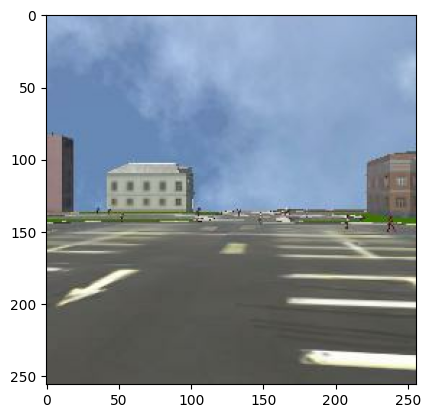

In [12]:
plt.imshow(train_data[0])

# Data preprocessing functions

In [13]:
def resize(image, IMG_SIZE=128, is_mask=False):
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))

  if is_mask:
    image = tf.cast(image, dtype=tf.uint8) / 255
  else:
    image = tf.cast(image, dtype=tf.float32) / 255.

  return image



In [14]:
X_train = [resize(image) for image in train_data]
y_train = [resize(image, is_mask=True) for image in train_mask]
X_val = [resize(image) for image in validation_data]
y_val = [resize(image, is_mask=True) for image in validation_mask]


In [15]:
X_train[0].shape, X_train[1].dtype, X_train[1]

(TensorShape([128, 128, 3]),
 tf.float32,
 <tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
 array([[[0.32647058, 0.31960785, 0.27745098],
         [0.34019607, 0.32254902, 0.28431374],
         [0.34705883, 0.3107843 , 0.27941176],
         ...,
         [1.        , 0.9980392 , 0.97843134],
         [1.        , 0.9990196 , 0.972549  ],
         [1.        , 1.        , 0.9705882 ]],
 
        [[0.35196078, 0.35980392, 0.33039215],
         [0.31666666, 0.3137255 , 0.2882353 ],
         [0.33529413, 0.3156863 , 0.29509804],
         ...,
         [0.9990196 , 0.9970588 , 0.98039216],
         [0.9990196 , 0.9970588 , 0.9794118 ],
         [0.9990196 , 0.9970588 , 0.9764706 ]],
 
        [[0.3480392 , 0.35392156, 0.33333334],
         [0.2990196 , 0.29705882, 0.27941176],
         [0.31960785, 0.30294117, 0.2901961 ],
         ...,
         [0.98333335, 0.9990196 , 0.96960783],
         [0.98333335, 0.9990196 , 0.96862745],
         [0.98333335, 0.9990196 , 0.96666664]],
 
     

In [16]:
y_train[0].shape, y_train[0].dtype, y_train[0]

(TensorShape([128, 128, 3]),
 tf.float32,
 <tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
 array([[[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],
 
        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],
 
        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],
 
        ...,
 
        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],
 
        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],
 
        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
      

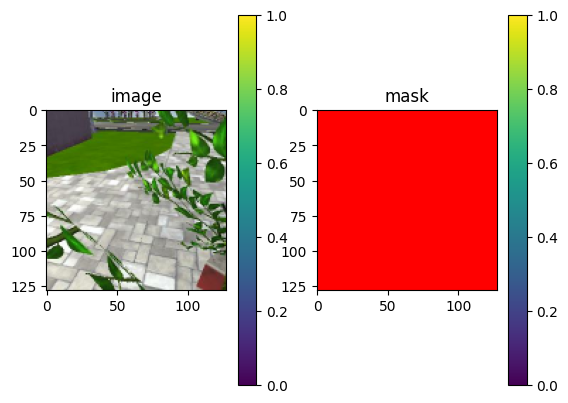

In [17]:
index = random.randint(0, len(X_train))


plt.subplot(1, 2, 1)
plt.imshow(X_train[index])
plt.title("image")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(y_train[index])
plt.title('mask')
plt.colorbar()

In [18]:
# turn data to tf dataset objects
X_train = tf.data.Dataset.from_tensor_slices(X_train)
X_val = tf.data.Dataset.from_tensor_slices(X_val)
y_train = tf.data.Dataset.from_tensor_slices(y_train)
y_val = tf.data.Dataset.from_tensor_slices(y_val)

In [19]:
X_train, X_val

(<_TensorSliceDataset element_spec=TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None)>,
 <_TensorSliceDataset element_spec=TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None)>)

## Data Augmentation

In [20]:
def brightness(img , mask, b=0.1):
  img = tf.image.adjust_brightness(img, b)
  return img, mask

def gamma(img, mask, g=0.1):
  img = tf.image.adjust_gamma(img, g)
  return img, mask


def hue(img, mask, h=-0.1):
  img = tf.image.adjust_hue(img, h)
  return img, mask

def flip_hori(img, mask):
  img = tf.image.flip_left_right(img)
  mask = tf.image.flip_left_right(mask)
  return img, mask


def flip_vert(img, mask):
  img = tf.image.flip_up_down(img)
  mask = tf.image.flip_up_down(img)
  return img, mask


def rotate(img, mask):
  img = tf.image.rot90(img)
  mask = tf.image.rot90(mask)
  return img, mask

In [21]:
train = tf.data.Dataset.zip((X_train, y_train))
val = tf.data.Dataset.zip((X_val, y_val))

# a = train.map(brightness)
# b = train.map(gamma)
# c = train.map(hue)
# e = train.map(flip_hori)
# f = train.map(flip_vert)
# g = train.map(rotate)

# train = train.concatenate(a)
# train = train.concatenate(b)
# train = train.concatenate(c)
# train = train.concatenate(e)
# train = train.concatenate(f)
# train = train.concatenate(g)

In [22]:
BATCH_SIZE = 64
train = train.shuffle(1000).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
val = val.batch(BATCH_SIZE)

In [23]:
def double_conv(x, n_filters):
  x = tf.keras.layers.Conv2D(n_filters, 3, padding='same', activation='relu')(x)
  x = tf.keras.layers.Conv2D(n_filters, 3, padding='same', activation='relu')(x)
  return x


def downsample(x, n_filters):
  x = double_conv(x, n_filters)
  p = tf.keras.layers.MaxPool2D()(x)
  p = tf.keras.layers.Dropout(0.3)(p)

  return x, p

def upsample(x, skip_layer, n_filters):
  x = tf.keras.layers.Conv2DTranspose(n_filters, 3, 2, padding='same')(x)
  x = tf.keras.layers.concatenate([x, skip_layer])
  x = tf.keras.layers.Dropout(0.3)(x)
  x = double_conv(x, n_filters)
  return x

In [33]:
inputs = tf.keras.layers.Input(shape=(128, 128, 3))

f1, p1 = downsample(inputs, 64)
f2, p2 = downsample(p1, 128)
f3, p3 = downsample(p2, 256)
f4, p4 = downsample(p3, 512)

bn = double_conv(p4, 1024)

u1 = upsample(bn, f4, 512)
u2 = upsample(u1, f3, 256)
u3 = upsample(u2, f2, 128)
u4 = upsample(u3, f1, 64)

outputs = tf.keras.layers.Conv2D(3, 1, padding='same', activation='sigmoid')(u4)

model = tf.keras.Model(inputs, outputs)
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 128, 128, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 conv2d_20 (Conv2D)          (None, 128, 128, 64)         36928     ['conv2d_19[0][0]']           
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 64)           0         ['conv2d_20[0][0]']           
 g2D)                                                                                       

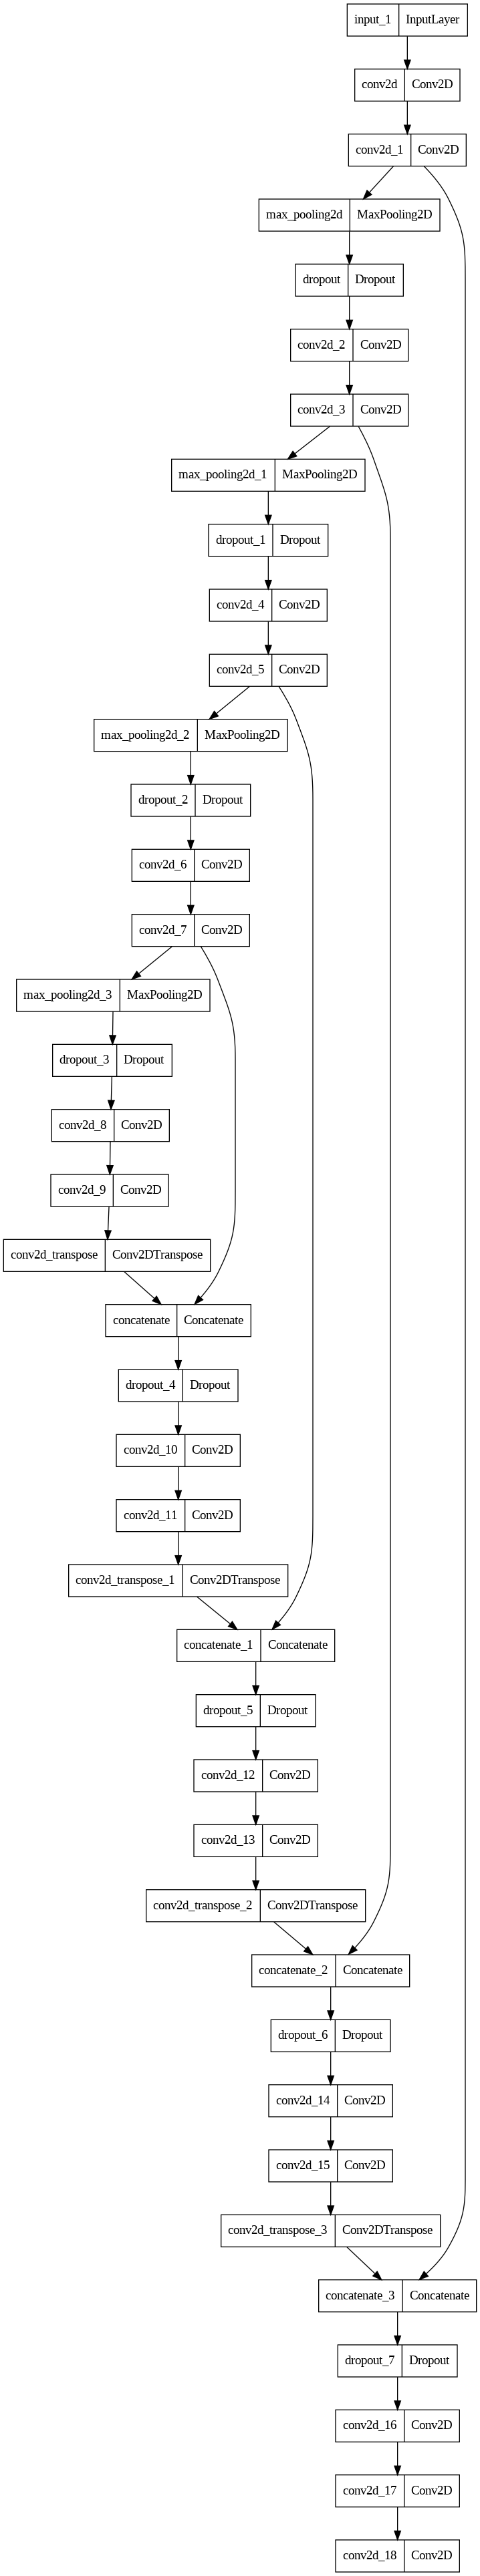

In [25]:
tf.keras.utils.plot_model(model)

In [34]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [36]:
history = model.fit(train,
                    epochs=10,
                    validation_data=val,
                    steps_per_epoch=len(train),
                    validation_steps=len(val))

Epoch 1/10
65/65 [==============================] - 75s 1s/step - loss: 0.0907 - accuracy: 0.9823 - val_loss: 0.0564 - val_accuracy: 0.9832
Epoch 2/10
65/65 [==============================] - 68s 1s/step - loss: 0.0398 - accuracy: 0.9848 - val_loss: 0.0415 - val_accuracy: 0.9840
Epoch 3/10
65/65 [==============================] - 68s 1s/step - loss: 0.0332 - accuracy: 0.9859 - val_loss: 0.0365 - val_accuracy: 0.9856
Epoch 4/10
65/65 [==============================] - 68s 1s/step - loss: 0.0298 - accuracy: 0.9869 - val_loss: 0.0331 - val_accuracy: 0.9861
Epoch 5/10
65/65 [==============================] - 68s 1s/step - loss: 0.0299 - accuracy: 0.9870 - val_loss: 0.0360 - val_accuracy: 0.9857
Epoch 6/10
65/65 [==============================] - 68s 1s/step - loss: 0.0285 - accuracy: 0.9874 - val_loss: 0.0321 - val_accuracy: 0.9878
Epoch 7/10
65/65 [==============================] - 68s 1s/step - loss: 0.0263 - accuracy: 0.9882 - val_loss: 0.0300 - val_accuracy: 0.9883
Epoch 8/10
65/65 [==

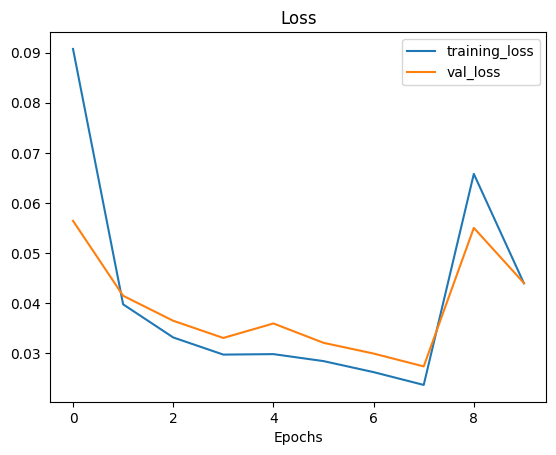

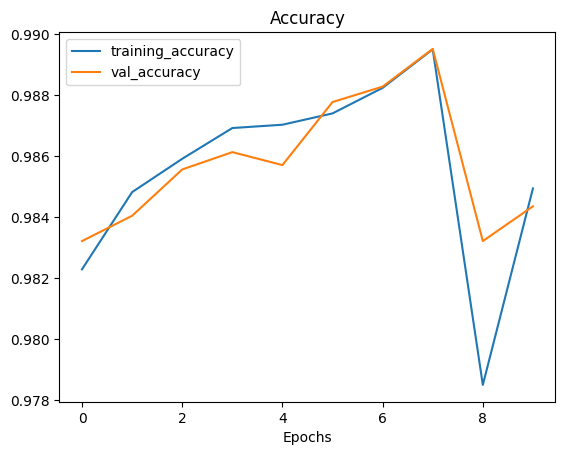

In [37]:
plot_loss_curves(history)

In [38]:
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

In [ ]:
for image, mask in val.take(10):
  pred_mask = model.predict(image)

  plt.figure(figsize=(10,10))


  plt.subplot(1, 3, 1)
  plt.imshow(image[0])
  plt.title("image")
  plt.axis(False)

  plt.subplot(1,3,2)
  plt.imshow(mask[0])
  plt.title('true mask')
  plt.axis(False)

  plt.subplot(1,3,3)
  plt.imshow(create_mask(pred_mask))
  plt.title("predict mask")
  plt.axis(False)

2/2 [==============================] - 0s 117ms/step
